---
## 1. 프로그래밍 기초

***변수란?***

변수는 메모리에 저장된 값의 위치에 주어진 이름. <br>
그래서 이름을 부르는 순간 위치를 불러 값을 보여줌. <br>


***부동소수(floating point)이란?***

다 표현할 수 없는 긴 실수를 컴퓨터 상에서 근사하게 표현하는 방식. 
최대 차이는 10*-15 이하.

**예제)**

0.1을 작성했지만, 컴터에서 인지할 수 있는 가장 근사한 값인 0.1xx를 불러낼 것 임
```
print(0.1+0.2) # 0.30000000000000004
```



***추가***

```
10e2 # e == 10의 x승
```

* 파이썬 기본 문법
```
SET.union # 합집합
SET.intersection # 교집합
SET.difference # 차집합
```

* 글로벌 vs 비지역 변수
```
# outer(), inner() 함수 입장에서 전역(global) 범위
def outer():
    # outer() 함수 입장에서 지역(local) 범위
    # inner() 함수 입장에서 비지역(nonlocal) 범위
    def inner():
        # inner 함수 입장에서 지역(local) 범위
```

```
a = 5

def func1(a):
    def func2():
        nonlocal a # 한단계 밖에 있는 변수
        global a # 완전히 밖에 있는 변수
        a += 1
        return a
    return func2()

func1(2)
```

***모듈이란?***

쓸 수 있도록 미리 만들어진 것. eg. 함수, 변수, 클래스...

***__name__ 변수란?***

현재 실행 중인 파일 이름 or 불러온 모듈인 경우 모듈이름(파일)이 __name__변수에 저장됨

***객체지향과(Object) 절차지향(Procedureal)***

절차지향 
- 데이터 구조 및 그 데이터를 변화시키는 알고리즘

객체지향: 
- 객체들이 통신하여 원하는 결과를 얻음. eg. 인스턴스 생성 객체 & 인스턴스 관리 객체
- 각 객체는 고유의 데이터 + 데이터를 처리할 수 있는 메소드로 구성 


***특수 메소드***

- 생성자 __init__()

- 소멸자 __del__()

***정적 메소드 & 클래스 메소드***


```
class human:
    count = 0 
    
    def __init__(self):
        self.height = 3
        self.age = 22
        
    def __call__(self,*a): # 객체를 매소드처럼 호출할 때 eg. juyeon = human(); juyeon(); 시 호출
        print("안뇽")
    
    @staticmethod
    def smethod(): # 이렇게 인스턴스 생성 X -> self 매개변수도 사용하지 않음
        print("정적 메소드")
    
    @classmethod
    def cmethod(cls): # 객체를 만들지 않고 클래스 자체에 접근
        print("클래스 메소드")
        print(cls.count)
        
human.smethod()
human.cmethod()
```

***Private & Public variable***


```
class human:
    def __init__(self):
        self.name = 'Juyeon'
        self.__age = 22
        
juyeon = human()
print(juyeon.name) # public variable
print(juyeon.__age) # private variable
```

***Getter & Setter***


In [39]:
class human:
    def __init__(self):
        self.name = 'Juyeon'
        self.__age = 22
        
    @property # 해당 데코레이터를 쓰지 않아도 getter & setter을 선언 가능하지만, 원활한 디버깅을 위해 사용을 권고
    def age_getter(self): # getter
        return self.__age
    
    @age_getter.setter
    def age_setter(self, value): # setter
        self.__age = value
        
    def __del__(self):
        print('오브젝트가 삭제되었습니다')

In [48]:
juyeon = human()
juyeon.age_getter()
juyeon.age_setter(23)
juyeon.age_getter()

del juyeon

23

***상속***

- 상속하는 클래스 == base | super class
- 상속받는 클래스 == derived | sub class

- 파라미터로 부모 클래스 전달 후, 추가하려는 메소드를 따로 정의하여 사용할 수 있다. 
- 부모의 메소드는 super()를 사용하여 불러올 수 있다.
```
class parent:
    def __init__(self):
        print('this is parent')
       
    def addition(self,x,y):
        return x+y
```
```
class kid(parent):
    def addition2(self,x,y):
        super().addition(x,y)
        print('더하기 완료')
```

***Overriding***

- 부모의 메소드와 같은 이름의 메소드를 자식에게 정의 -> 새롭게 정의된 메소드를 사용함. 

***다중 상속***

아래와 같은 상황에서 C는 먼저 입력된 A의 함수를 상속받음.

```
class A:
    def 함수(self):
        결과

class B:
    def 함수(self):
        결과
        
class C(A,B):
    pass
```

***추상클래스***

- 추상클래스 언제 사용? <br>
: 이름에 집중. 추상클래스 자체는 객체 생성을 위한게 아님. <br>
: 상속받는 객체가 특정 메소드를 꼭 가지게 하고 싶은 경우. 실수로 메소드를 빼먹고 클래스를 정의하는 경우를 방지하기위해 사용.



In [62]:
from abc import ABCMeta, abstractmethod

class Abstract(metaclass=ABCMeta): # abcmeta를 상속받아 추상클래스 생성
    # 해당 데코레이터를 이용하여 
    # Abstract 클래스를 상속받는 하위객체는 
    # 아래 method 메소드를 갖도록 강제할 수 있음 
    @abstractmethod 
    def method(self): # 상속받는 클래스가 해당 메소드가 없으면 객체가 생성되지 않아
        pass

class test(Abstract):
    def method(self):
        pass
    
test1 = test() # 추상클래스는 자신의 객체를 생성할 수 없음

***isinstance(인스턴스, 클래스이름)***

해당 객체가 어떠한 클래스의 인스턴스인지 확인해주는 함수

```
a = 3
isinstance(a, int) # True
```

***예외처리***

```
try:
    에러 문장
except TypeError: # 에러 이름 특정 가능 
    print("type error")
except Exception as e: # 에러구문이 e에 저장
    print(e)
    에러가 났을 때 실행할 문장
else:
    에러가 안나면 실행할 문장
finally:
    에러 발생 여부와 상관없이 실행될 문장
```

***에러발생***

In [59]:
raise Exception("강제로 에러를 발생시킴")

Exception: 강제로 에러를 발생시킴

In [61]:
A = 3
assert A > 3, 'A가 3보다 작습니다' # assert __조건__, 에러구문!!

AssertionError: A가 3보다 작습니다

***파일의 입출력***

1. 읽기쓰기

```
file = open(파일위치, 열기방식, 인코딩방식)
file.read()
file.readlines() # 파일의 모든 줄을 읽고, 각 줄을 원소로 갖는 리스트 반환
file.readline() # 맨 처음엔 첫줄, 부를 때마다 그 다음 줄을 불러오는 함수
file.write()
file.writelines([리스트])
file.close() # 닫아줘야 메모리에서 파일이 제거돼

with open(파일명,방법):
    file.read() # close 생략해도 무방
```

*절대경로(c드라이브부터끝까지) vs 상대경로(현재위치부터끝까지)
```
import os
os.getcwd() # 현재위치
os.listdir() # 숨겨진 파일까지 다 보여주기
```

2. 인코딩?

컴터는 0,1로만 데이터를 저장하잖아. <br>
인코딩이란 컴터가 이해할수 있는 문자로 표현하는 걸 말함. <br>
그걸 표기하는 옛날 표기법이 바로 ASCII.<br>
한글, 중국어 인코딩할 수 없어서 다른 표기법 생겨났어. <br>
유니코드가 대표적. 모든 문자를 표현할 수 있게 하는 것이 목적. 2바이트(16비트.2^16) 안에서 나눠 표현. <br>
그런데 누락된 기호들을 추가하다보니 2바이트 초과. <br>
이후 새로 변형된 형식의 표기법인 UTF(Unicode Transformation Format) 출현.  <br>

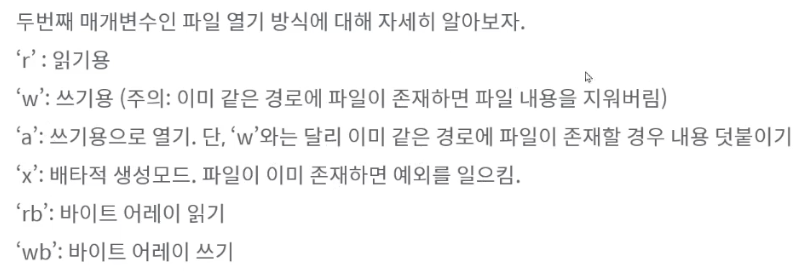

2. 직렬화 (Serialization)


**저장**

객체를 컴퓨터에 저장하기 위해 연속적인 데이터(0과 1의 조합)로 변환하는 것. 

```
import pickle

pickle.dump(출력할객체, 파일객체)

with open(파일명, 'wb') as f: # wb(write in byte)
    pickle.dump(저장할객체, f) # 파일객체에 저장할객체를 저장
    
pickle.dumps(저장할객체) # 저장할객체를 바이트로 변환
```


In [64]:
import pickle

pickle.dumps([1,2,3])

b'\x80\x03]q\x00(K\x01K\x02K\x03e.'

**불러올 때**

```
pickle.load(파일객체)
pickle.loads(바이트객체)
```


In [66]:
import pickle

pickle.loads(pickle.dumps([1,2,3]))

[1, 2, 3]

**Json**

피클 친구. 또다른 직렬화 방식. 

인간이 편한 방식으로 저장이 가능하기 때문에, 모든 객체를 직렬화하여 저장할 수는 없다는 한계.

```
import json

with open(파일명, 'w') as f: # json은 객체를 바이트로 저장하지 않기 때문에 pickle과 달리 wb 대신 w 사용
    json.dump([1,2,3])
```

In [69]:
import json

json.dumps([1,2,3,4]) # 바이트로 변환 안하고 저장

'[1, 2, 3, 4]'

In [70]:
import json

json.loads(json.dumps([1,2,3,4]))

[1, 2, 3, 4]

***병렬처리 (Parellel processing)*** 

직렬: 앞에있는 프로세스 먼저 -> 후에 다음 프로세스 실행

병렬: 여러개의 프로세스 처리 동시에


하드디스크: 다운받은 파일/프로그램을 저장하는 장소

프로세스(메모리): == 작업장. 실행 중인 프로그램. 자원(eg. CPU 몇프로) & 쓰레드로 구성

쓰레드: == 일꾼. 프로세스 내에서 실제로 작업을 하는 것. 

파이썬은 싱글 쓰레드로 순차적으로 동작. 병렬처리를 위해서는 아래와 같이 별도의 모듈 필요. 

In [ ]:
# 단 쥬피터, 콜랩에서 멀티프로세싱이 잘 작동하지 않아 일반 에디터|프롬프트에서 작동시킬 것 

from threading import Thread
import time

def work(work_id, start, end, result):
    total = 0
    for i in range(start, end):
        total += i
    result.append(total)
    
if __name__ == "__main__":
    start = time.time() # current time
    result = []
    th1 = Thread(target=work, args=(1,0,100000,result))
    th2 = Thread(target=work, args=(2,100001,200000,result))
    
    th1.start()
    th2.start()
    th1.join()
    th2.join()
    
    print(sum(result))
    print(time.time()-start) # 소요시간확인


**그런데** 사실 파이썬에서는 CPU 작업에서는 멀티쓰레드를 쓴 것과 싱글 쓰레드로 실행시킨 것의 큰 차이가 없어. 다만 I/O 처럼 파일을 읽고 쓰는 작업이 많은 경우에는 멀티 쓰레드가 효과적일 수 있지~

그래서 파이썬에서 CPU 작업에는 멀티쓰레드 대신 

**1) Pool 멀티프로세서**

작업(프로세스)를 여러개 만들어서 프로세서가 풀어야할 값을 알아서 가져가서 풀게끔해. 그리고 CPU가 자원을 배정해줌.


In [ ]:
from multiprocessing import Pool
import os
import time

def f(x):
    print(x, os.getpid()) # 프로세서 아이디 출력. 프로세스별 할당된 자원을 볼 수 있음
    return x*x

# 자식프로세스도 전체 파일을 다 실행하는데, 
# 아래 if문이 없으면, 네임이 메인이 아닐 때에도 프로세스가 만들어지니까 무한정 반복되게 돼
if __name__ == '__main__':
    start = time.time()
    p = Pool(4) # 단, 프로세서를 너무 많이 띄울 경우 띄우는 데 시간이 소요될 수 있음
    result = p.map(f, range(100))
    p.close()
    print(result)
    print(time.time()-start) # 소요시간 확인


*추가예제: 여러 변수를 넣고 싶을 때

In [ ]:
from multiprocessing import Pool
import os

def f(x):
    return x[0]*x[1]

if __name__ == '__main__':
    p = Pool(4) 
    result = p.map(f, zip(range(100), range(100)))
    p.close()
    print(result)

**2) Process 멀티프로세서**

pool과 달리 풀어야할 값들을 프로세서에게 지정해서 줘. 

In [ ]:
from multiprocessing import Process
import os

def f(x):
    print(x*x)
    
print(__name__)

if __name__ == '__main__':
    numbers = [1,2,3,4]
    proc1 = Process(target=f, args=(numbers[0],))
    proc1.start()
    proc2 = Process(target=f, args=(numbers[1],))
    proc2.start()
    proc3 = Process(target=f, args=(numbers[2],))
    proc3.start()
    proc4 = Process(target=f, args=(numbers[3],))
    proc4.start()
    proc1.join()
    proc2.join()
    proc3.join()
    proc4.join()